# Customer Segmentation using KMeans

### Import libraries

In [1]:
import random 
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt 
from sklearn.cluster import KMeans 
%matplotlib inline

### Load Data From CSV File  

In [2]:
df = pd.read_csv("customers.csv")
df.head()

,Customer Id,Age,Edu,Years Employed,Income,Card Debt,Other Debt,Defaulted,Address,DebtIncomeRatio
0,1,41,2,6,19,0.124,1.073,0.0,NBA001,6.3
1,2,47,1,26,100,4.582,8.218,0.0,NBA021,12.8
2,3,33,2,10,57,6.111,5.802,1.0,NBA013,20.9
3,4,29,2,4,19,0.681,0.516,0.0,NBA009,6.3
4,5,47,1,31,253,9.308,8.908,0.0,NBA008,7.2


In [3]:
df.shape

(850, 10)

### Pre-processing

In [4]:
df = df [['Age','Income']]
df.head()

,Age,Income
0,41,19
1,47,100
2,33,57
3,29,19
4,47,253


In [5]:
# Standarize data
from sklearn.preprocessing import scale
df['Age'] = scale(df['Age'])
df['Income'] = scale(df['Income'])
df.head()

,Age,Income
0,0.742915,-0.718459
1,1.489490,1.384325
2,-0.252518,0.268032
3,-0.750235,-0.718459
4,1.489490,5.356249


### Modeling

In [6]:
clusterNum = 3
k_means = KMeans(n_clusters = clusterNum)
k_means.fit(df)
labels = k_means.labels_
print(labels)

[2 2 1 1 0 2 2 2 1 0 2 1 1 2 1 1 1 2 2 1 1 2 1 2 0 2 1 2 2 1 2 2 1 2 1 1 1
 1 1 0 1 0 1 0 2 2 1 1 1 1 2 1 1 2 1 1 1 1 2 2 2 1 2 2 1 1 2 1 2 1 1 2 1 1
 1 1 2 1 0 2 1 1 0 2 2 1 1 1 1 1 2 1 1 1 1 2 2 2 1 1 1 0 2 2 1 2 2 1 1 2 2
 1 1 1 1 2 1 1 1 1 1 1 1 2 1 2 1 1 1 1 1 2 1 1 1 1 2 1 2 2 2 1 1 1 2 1 2 2
 1 1 1 2 2 2 2 1 0 2 1 1 1 2 2 1 1 1 1 1 1 2 2 1 1 1 1 2 2 1 1 2 2 1 1 0 2
 1 2 2 2 2 1 2 2 2 2 1 1 2 0 2 0 2 1 2 2 2 1 0 2 1 1 1 2 2 2 1 2 1 2 2 1 0
 1 1 1 1 2 1 2 2 2 1 1 1 2 1 2 1 1 1 1 2 1 1 2 0 2 2 1 1 1 1 2 1 2 1 2 1 1
 1 2 1 1 1 2 2 1 2 2 2 1 1 1 2 2 1 1 2 1 1 1 0 0 1 2 1 2 1 2 2 1 2 1 1 1 1
 1 1 1 2 2 2 1 1 1 2 2 1 1 2 1 1 2 1 2 1 1 1 2 2 2 2 2 1 1 1 1 1 2 2 1 0 1
 2 2 2 1 2 1 2 2 2 1 2 2 2 1 1 1 1 0 1 1 1 1 2 2 1 1 1 0 1 1 1 2 1 2 0 0 2
 1 1 2 2 1 1 1 1 1 1 2 1 1 2 0 1 2 1 1 2 2 1 2 1 1 1 1 0 2 1 1 1 1 1 1 2 2
 2 1 2 1 2 1 2 1 2 2 2 2 1 1 2 1 1 2 2 2 2 1 1 2 2 1 1 2 1 1 1 2 2 2 2 1 0
 2 1 2 2 2 1 2 1 1 1 0 1 1 1 1 2 2 0 1 2 1 2 2 1 1 2 2 2 2 2 2 1 2 1 1 1 1
 2 2 1 2 1 1 2 1 1 1 2 2 

### Insights
We assign the labels to each row in dataframe.

In [7]:
df["cluster"] = labels
df.head(5)

,Age,Income,cluster
0,0.742915,-0.718459,2
1,1.489490,1.384325,2
2,-0.252518,0.268032,1
3,-0.750235,-0.718459,1
4,1.489490,5.356249,0


We can easily check the centroid values by averaging the features in each cluster.

In [8]:
df.groupby('cluster').mean()

,Age,Income
cluster,,
0,1.225993,2.970447
1,-0.745990,-0.416566
2,0.870738,0.132960


In [9]:
df.cluster.value_counts()

1    469
2    330
0     51
Name: cluster, dtype: int64

Now, lets look at the distribution of customers based on their age and income:

In [10]:
centers = k_means.cluster_centers_

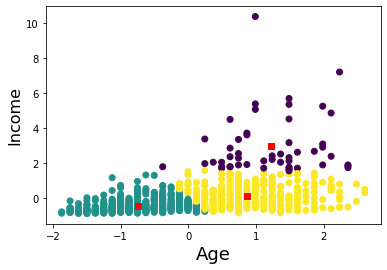

In [11]:
plt.scatter(df['Age'], df['Income'], c=labels.astype(np.float))
plt.xlabel('Age', fontsize=18)
plt.ylabel('Income', fontsize=16)
plt.scatter(centers[:,0],centers[:,1], c="red",marker="s" )
plt.show()

In [12]:
k_means.inertia_    # Sum of squared distances of samples to their closest cluster center

574.924286801845